In [1]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import numpy as np

In [2]:
z=zipfile.ZipFile("C:/Users/claud/Downloads/20220411_1845_REVOCACION_MANDATO_2022.zip")
z.namelist()

['20220411_1845_REVOCACION_MANDATO_2022/',
 '20220411_1845_REVOCACION_MANDATO_2022/20220411_1845_COMPUTOS_RM2022.csv',
 '20220411_1845_REVOCACION_MANDATO_2022/CATALOGO_UNIDADES_TERRITORIALES_RM2022.csv',
 '20220411_1845_REVOCACION_MANDATO_2022/LEEME.txt']

In [3]:
df=pd.read_csv(z.open('20220411_1845_REVOCACION_MANDATO_2022/20220411_1845_COMPUTOS_RM2022.csv'),encoding='latin-1', skiprows=6)
df.columns=df.columns.str.lower()
df.columns

Index(['clave_casilla', 'clave_acta', 'id_entidad', 'entidad',
       'id_distrito_federal', 'distrito_federal', 'sección', 'id_casilla',
       'tipo_casilla', 'ext_contigua', 'ubicación_casilla', 'num_acta_impreso',
       'que_se_le_revoque_el_mandato_por_pérdida_de_la_confianza',
       'que_siga_en_la_presidencia_de_la_república', 'nulos',
       'total_votos_calculados', 'lista_nominal', 'observaciones',
       'mecanismos_traslado', 'tipo_documento', 'fecha_hora_captura',
       'código_integridad'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57449 entries, 0 to 57448
Data columns (total 22 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   clave_casilla                                             57449 non-null  object
 1   clave_acta                                                57449 non-null  object
 2   id_entidad                                                57449 non-null  int64 
 3   entidad                                                   57449 non-null  object
 4   id_distrito_federal                                       57449 non-null  int64 
 5   distrito_federal                                          57449 non-null  object
 6   sección                                                   57449 non-null  int64 
 7   id_casilla                                                57449 non-null  int64 
 8   tipo_casilla              

In [5]:
#string a numeric
for col in  df.columns[11:17]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [6]:
df["part"]=df["total_votos_calculados"]/df["lista_nominal"]*100
df.replace([np.inf, -np.inf], np.nan, inplace=True)

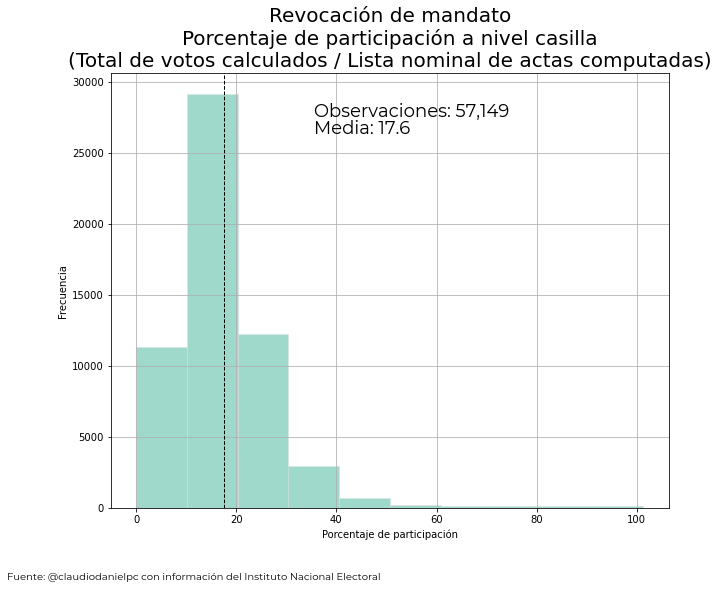

In [7]:
#Definición de la figura
fig, ax = plt.subplots(figsize=(10, 8))

#Fuente del gráfico
plt.rcParams["font.family"] = "Montserrat"
plt.rcParams['savefig.facecolor']='white'

plt.hist(df["part"],
         facecolor='#7fcdbb',
         alpha=0.75,
         edgecolor='#e0e0e0',
         linewidth=0.5
         )
#Línea de la media
plt.axvline(df["part"].mean(), color='k',
            linestyle='dashed', linewidth=1)


#Textos en el gráfico

min_ylim, max_ylim = plt.ylim()
#Total de observaciones
plt.text(df["part"].mean()*2.01, max_ylim*0.9,
         'Observaciones: {:,.0f}'.format(df["part"].count()), size=18)

         #Media de participación
plt.text(df["part"].mean()*2.01, max_ylim*0.86,
         'Media: {:.1f}'.format(df["part"].mean()), size=18)

#Títulos de ejes
plt.xlabel('Porcentaje de participación')
plt.ylabel('Frecuencia')

#Título del gráfico
plt.title("Revocación de mandato\n"
          "Porcentaje de participación a nivel casilla\n"
          "(Total de votos calculados / Lista nominal de actas computadas)", size=20)
#Cuadrícula del gráfico
plt.grid(True)

fig.text(0.5, 0,
        'Fuente: @claudiodanielpc con información del Instituto Nacional Electoral',ha="right",
         size=10)

fig.savefig('D:/Documentos/Github/30DayChartChallenge/2022/day_9/day9.png', bbox_inches='tight')